In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('creditcard.csv')
df.shape

(158602, 31)

In [9]:
pd.options.display.max_columns = 100
x = df['Class'].value_counts(normalize=True)
x

0.0    0.997755
1.0    0.002245
Name: Class, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158602 entries, 0 to 158601
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    158602 non-null  float64
 1   V1      158602 non-null  float64
 2   V2      158602 non-null  float64
 3   V3      158602 non-null  float64
 4   V4      158602 non-null  float64
 5   V5      158602 non-null  float64
 6   V6      158602 non-null  float64
 7   V7      158602 non-null  float64
 8   V8      158601 non-null  float64
 9   V9      158601 non-null  float64
 10  V10     158601 non-null  float64
 11  V11     158601 non-null  float64
 12  V12     158601 non-null  float64
 13  V13     158601 non-null  float64
 14  V14     158601 non-null  float64
 15  V15     158601 non-null  float64
 16  V16     158601 non-null  float64
 17  V17     158601 non-null  float64
 18  V18     158601 non-null  float64
 19  V19     158601 non-null  float64
 20  V20     158601 non-null  float64
 21  V21     15

In [33]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158597,111499.0,1.753695,0.018874,-0.429072,4.161717,0.215270,0.811187,-0.328388,0.124104,1.297017,0.925459,-1.342173,-3.560343,-0.127983,1.436686,-2.426679,0.554229,0.309518,0.162733,-1.356323,-0.259487,-0.059761,0.046540,0.032887,0.375723,0.050400,0.075297,-0.062722,-0.037895,89.03,0.0
158598,111499.0,-0.223112,0.969299,0.774386,-0.162188,0.134878,-1.627333,0.917096,-0.396720,1.209086,-0.674868,0.880116,-1.909454,1.809440,1.501507,-1.225561,-0.406242,0.621322,-0.808423,-0.613424,-0.119494,-0.337662,-0.560819,0.282673,0.869122,-0.610198,0.034188,0.098540,0.091763,1.79,0.0
158599,111499.0,-0.324219,1.078371,-0.661833,-1.060278,1.553663,-1.123551,1.788409,-0.653065,0.899690,-0.190682,1.711868,-1.797449,1.891790,1.945016,-1.551701,-0.580773,-0.131663,0.295118,-0.022733,0.136918,0.053192,0.870073,-0.223665,-0.390476,-0.264169,0.032943,0.325164,0.093798,31.00,0.0
158600,111500.0,-0.909674,1.204345,-0.038838,0.528709,2.760196,1.270910,0.929798,0.373622,0.090421,-1.511485,2.161028,-2.525702,0.551146,0.763656,-0.853826,-1.039936,2.400179,-0.115619,-0.742981,-0.104079,-0.066235,0.123375,-0.538330,-0.920971,0.985594,-0.251958,0.046382,0.055573,1.00,0.0
158601,111502.0,1.939272,-0.528638,-0.457417,0.289690,-0.413718,0.061268,-0.754919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df = df.iloc[df.index < 158601]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158601 entries, 0 to 158600
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    158601 non-null  float64
 1   V1      158601 non-null  float64
 2   V2      158601 non-null  float64
 3   V3      158601 non-null  float64
 4   V4      158601 non-null  float64
 5   V5      158601 non-null  float64
 6   V6      158601 non-null  float64
 7   V7      158601 non-null  float64
 8   V8      158601 non-null  float64
 9   V9      158601 non-null  float64
 10  V10     158601 non-null  float64
 11  V11     158601 non-null  float64
 12  V12     158601 non-null  float64
 13  V13     158601 non-null  float64
 14  V14     158601 non-null  float64
 15  V15     158601 non-null  float64
 16  V16     158601 non-null  float64
 17  V17     158601 non-null  float64
 18  V18     158601 non-null  float64
 19  V19     158601 non-null  float64
 20  V20     158601 non-null  float64
 21  V21     15

In [36]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158596,111498.0,1.969378,-0.242307,-0.068347,0.720586,-0.647182,-0.470082,-0.648397,-0.167131,2.626792,-0.568939,0.152742,-1.557857,2.583406,1.076699,-0.307714,-0.054404,0.244042,0.277816,-0.514831,-0.217955,0.059016,0.724484,0.127695,-0.026085,-0.107126,-0.251481,0.023643,-0.041423,9.99,0.0
158597,111499.0,1.753695,0.018874,-0.429072,4.161717,0.215270,0.811187,-0.328388,0.124104,1.297017,0.925459,-1.342173,-3.560343,-0.127983,1.436686,-2.426679,0.554229,0.309518,0.162733,-1.356323,-0.259487,-0.059761,0.046540,0.032887,0.375723,0.050400,0.075297,-0.062722,-0.037895,89.03,0.0
158598,111499.0,-0.223112,0.969299,0.774386,-0.162188,0.134878,-1.627333,0.917096,-0.396720,1.209086,-0.674868,0.880116,-1.909454,1.809440,1.501507,-1.225561,-0.406242,0.621322,-0.808423,-0.613424,-0.119494,-0.337662,-0.560819,0.282673,0.869122,-0.610198,0.034188,0.098540,0.091763,1.79,0.0
158599,111499.0,-0.324219,1.078371,-0.661833,-1.060278,1.553663,-1.123551,1.788409,-0.653065,0.899690,-0.190682,1.711868,-1.797449,1.891790,1.945016,-1.551701,-0.580773,-0.131663,0.295118,-0.022733,0.136918,0.053192,0.870073,-0.223665,-0.390476,-0.264169,0.032943,0.325164,0.093798,31.00,0.0
158600,111500.0,-0.909674,1.204345,-0.038838,0.528709,2.760196,1.270910,0.929798,0.373622,0.090421,-1.511485,2.161028,-2.525702,0.551146,0.763656,-0.853826,-1.039936,2.400179,-0.115619,-0.742981,-0.104079,-0.066235,0.123375,-0.538330,-0.920971,0.985594,-0.251958,0.046382,0.055573,1.00,0.0


In [37]:
X = pd.DataFrame.drop(df, columns = ['Class'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158601 entries, 0 to 158600
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    158601 non-null  float64
 1   V1      158601 non-null  float64
 2   V2      158601 non-null  float64
 3   V3      158601 non-null  float64
 4   V4      158601 non-null  float64
 5   V5      158601 non-null  float64
 6   V6      158601 non-null  float64
 7   V7      158601 non-null  float64
 8   V8      158601 non-null  float64
 9   V9      158601 non-null  float64
 10  V10     158601 non-null  float64
 11  V11     158601 non-null  float64
 12  V12     158601 non-null  float64
 13  V13     158601 non-null  float64
 14  V14     158601 non-null  float64
 15  V15     158601 non-null  float64
 16  V16     158601 non-null  float64
 17  V17     158601 non-null  float64
 18  V18     158601 non-null  float64
 19  V19     158601 non-null  float64
 20  V20     158601 non-null  float64
 21  V21     15

In [38]:
y = df['Class']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
158596    0.0
158597    0.0
158598    0.0
158599    0.0
158600    0.0
Name: Class, Length: 158601, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [42]:
X_train.shape

(111020, 30)

In [43]:
X_test.shape

(47581, 30)

In [44]:
y_train.shape

(111020,)

In [45]:
y_test.shape

(47581,)

In [46]:
param = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [47]:
gscv = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=param, scoring='roc_auc', cv=3)

In [48]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [49]:
gscv.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 15}

In [50]:
y_pred = gscv.predict_proba(X_test)

In [53]:
y_pred

array([[9.99790381e-01, 2.09619022e-04],
       [9.99790381e-01, 2.09619022e-04],
       [9.99763156e-01, 2.36843901e-04],
       ...,
       [9.99665834e-01, 3.34165531e-04],
       [9.99808324e-01, 1.91675825e-04],
       [9.99808324e-01, 1.91675825e-04]])

In [56]:
y_pred_proba = y_pred[:, 1]
y_pred_proba

array([0.00020962, 0.00020962, 0.00023684, ..., 0.00033417, 0.00019168,
       0.00019168])

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

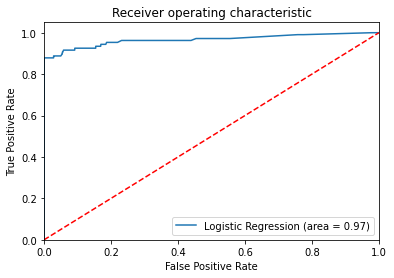

In [61]:
logit_roc_auc = roc_auc_score(y_test, y_pred_proba)
# logit_roc_auc = roc_auc_score(y_test, gscv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()